In [1]:
import pandas as pd

# Sample data (manually created)
data = {
    'Age': ['Young', 'Young', 'Middle', 'Old', 'Old', 'Old', 'Middle', 'Young'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No'],
    'Credit_Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair'],
    'Buys_Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No']
}

df = pd.DataFrame(data)


In [2]:
from sklearn.preprocessing import LabelEncoder

# Create a copy
df_encoded = df.copy()

# Encode categorical columns
label_encoders = {}
for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le  # Save encoder for reverse lookup


In [3]:
df_encoded


,Age,Income,Student,Credit_Rating,Buys_Computer
0,2,0,0,1,0
1,2,0,0,0,0
2,0,0,0,1,1
3,1,2,0,1,1
4,1,1,1,1,1
5,1,1,1,0,0
6,0,1,1,0,1
7,2,2,0,1,0


In [4]:
# Features: All columns except target
X = df_encoded.drop('Buys_Computer', axis=1)

# Target: Buys_Computer column
y = df_encoded['Buys_Computer']


In [5]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X, y)


DecisionTreeClassifier()

In [6]:
# Encode new input manually
test_input = [
    label_encoders['Age'].transform(['Middle'])[0],
    label_encoders['Income'].transform(['Low'])[0],
    label_encoders['Student'].transform(['Yes'])[0],
    label_encoders['Credit_Rating'].transform(['Fair'])[0],
]

# Reshape and predict
prediction = model.predict([test_input])

# Decode the prediction
result = label_encoders['Buys_Computer'].inverse_transform(prediction)
print("Prediction:", result[0])


Prediction: Yes


C:\Users\HTC\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


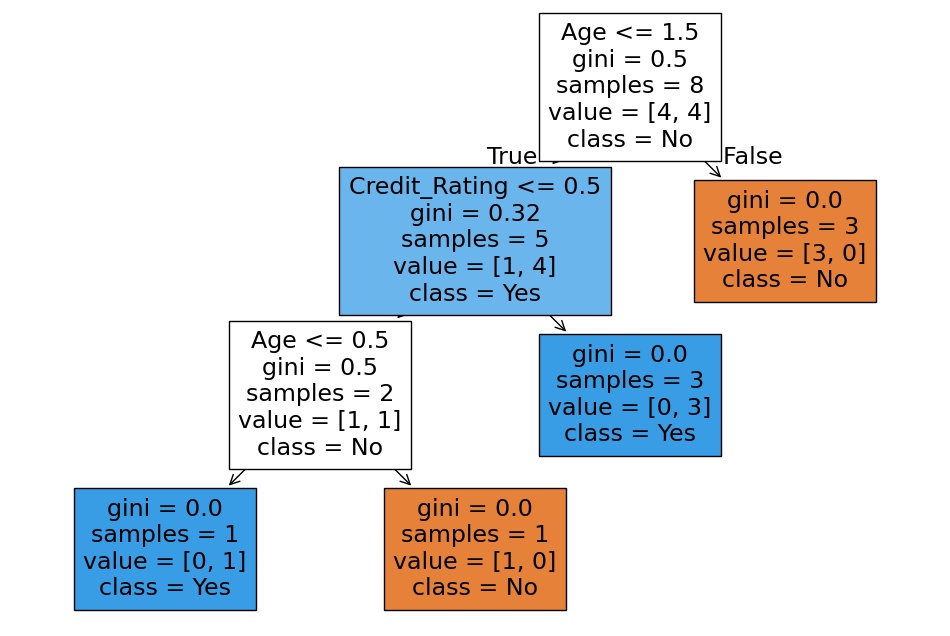

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=label_encoders['Buys_Computer'].classes_, filled=True)
plt.show()
